In [1]:
datapath = r"G:\Shared drives\LFL\Labber\Data\2021\11\Data_1103\NIST-JPA-A-AlBox-fluxsweep_4.hdf5"

In [2]:
import fitTools.quasiparticleFunctions as qp
import numpy as np
import matplotlib.pyplot as plt
import os
import Labber

from fitTools.Resonator import Resonator
from scipy.optimize import curve_fit

from scipy.signal import savgol_filter

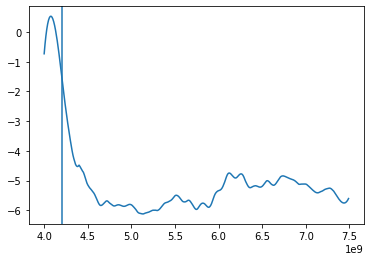

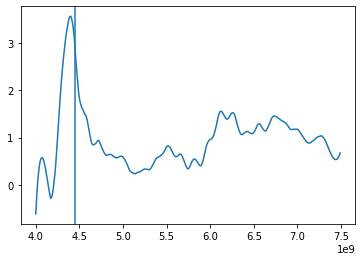

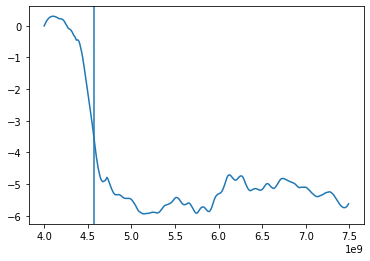

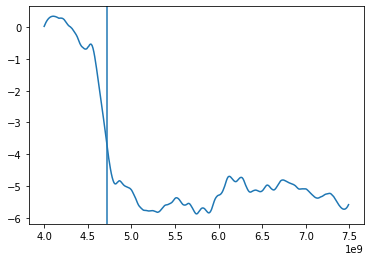

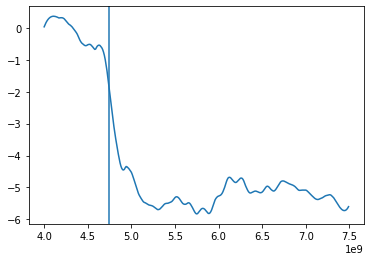

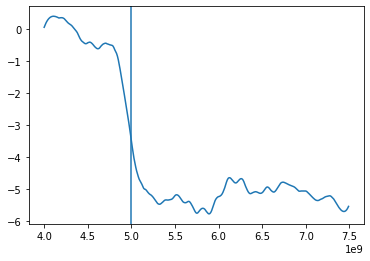

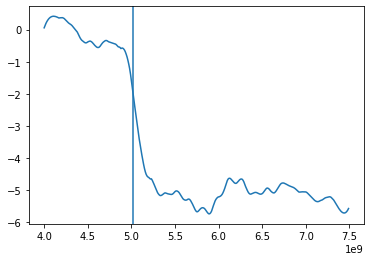

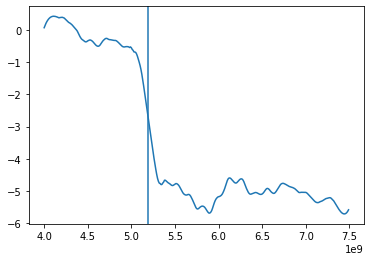

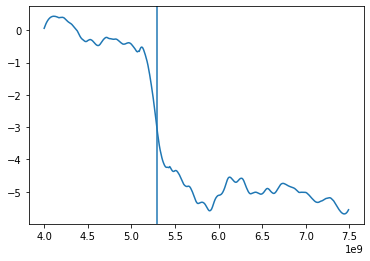

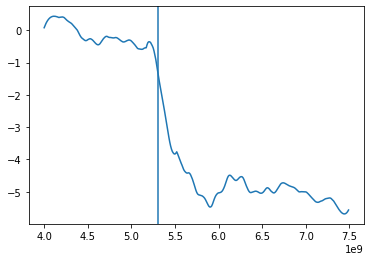

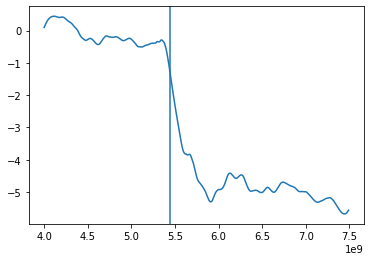

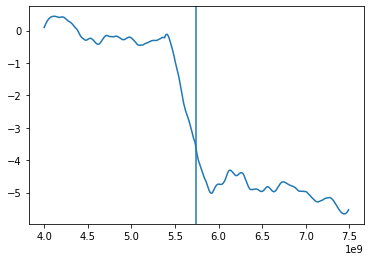

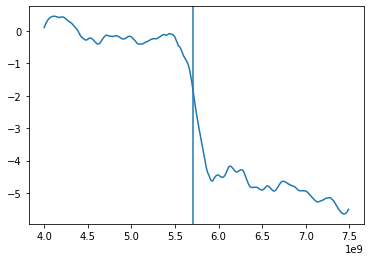

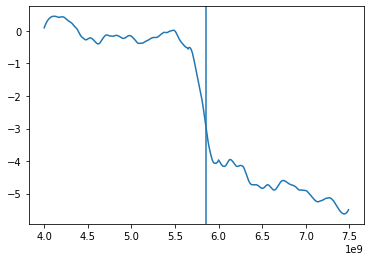

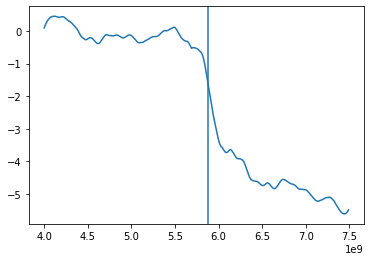

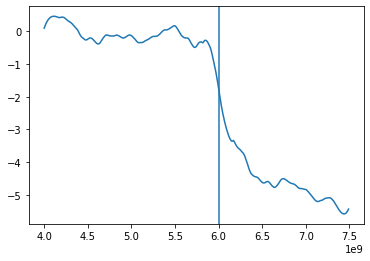

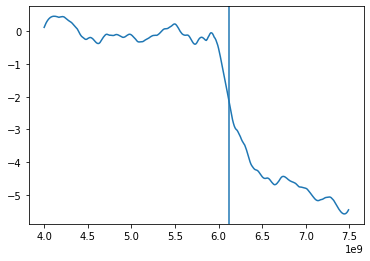

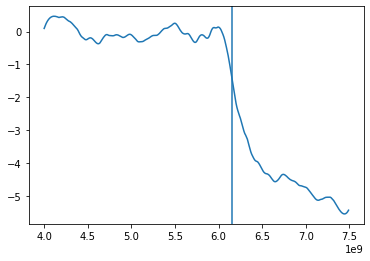

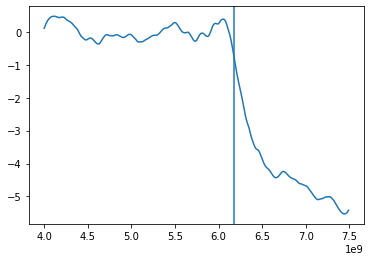

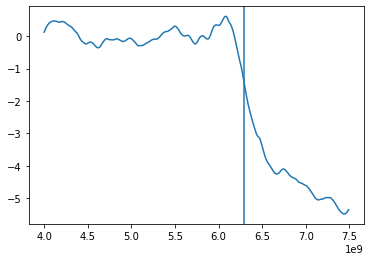

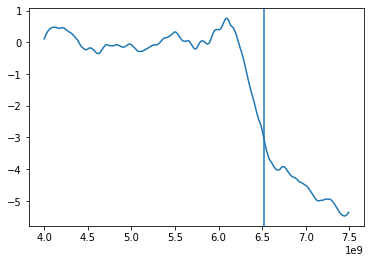

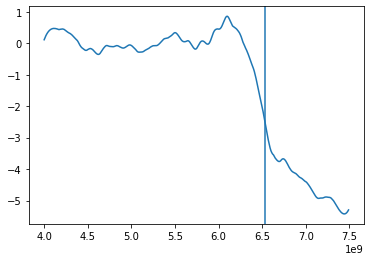

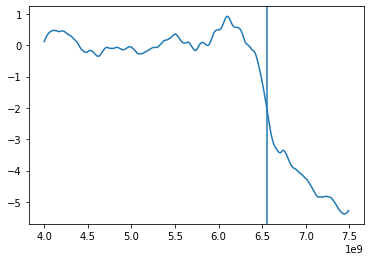

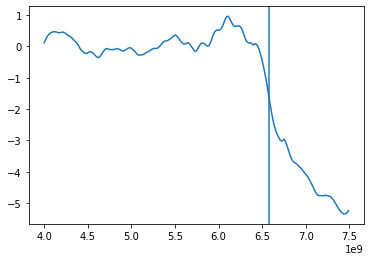

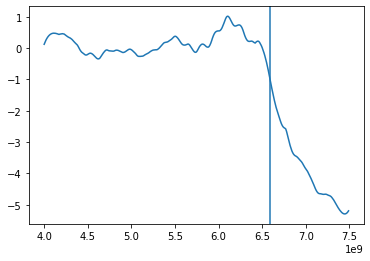

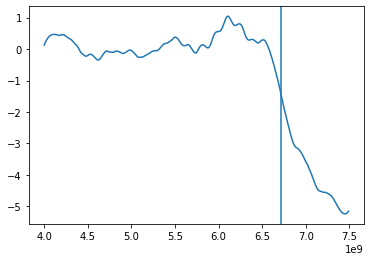

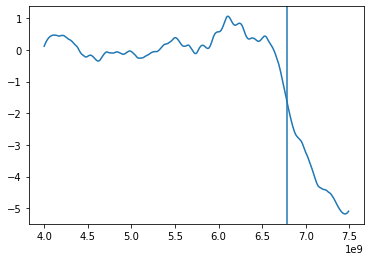

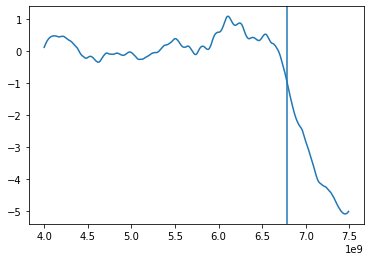

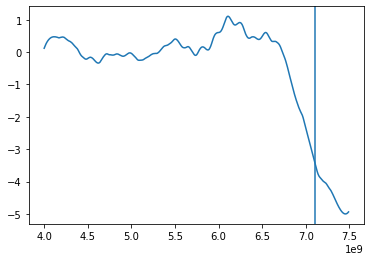

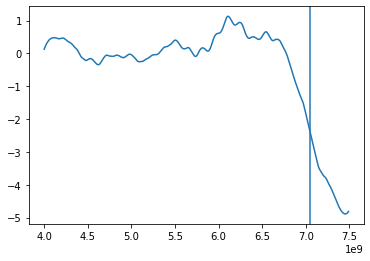

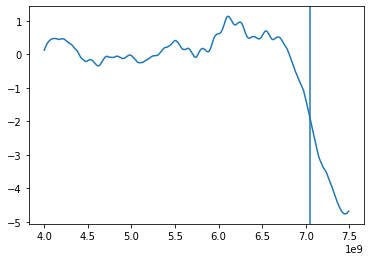

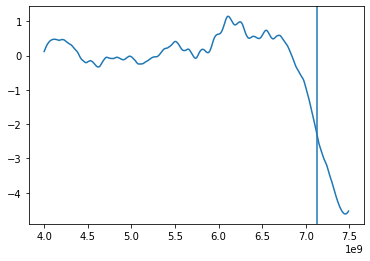

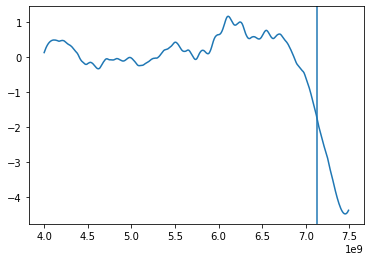

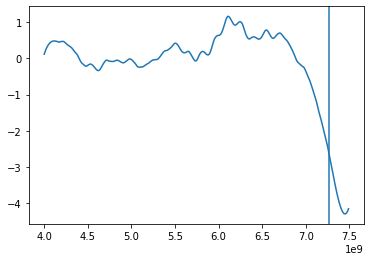

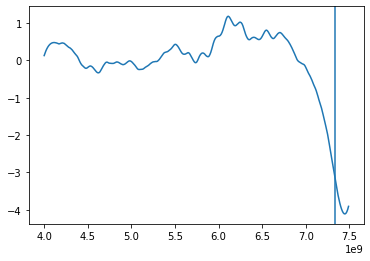

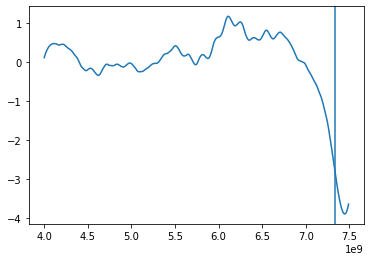

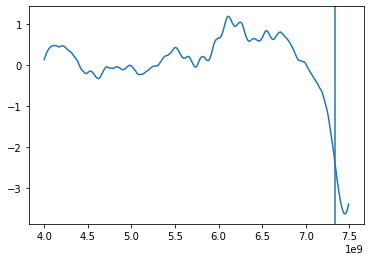

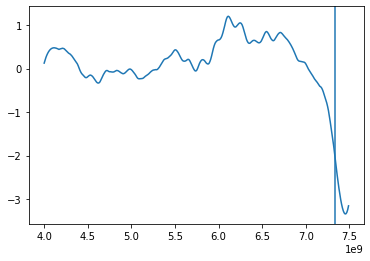

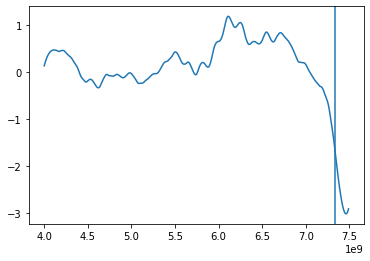

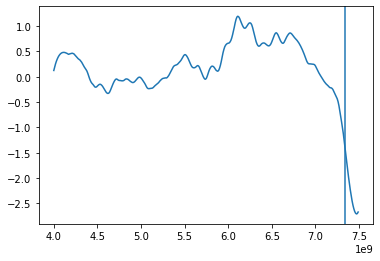

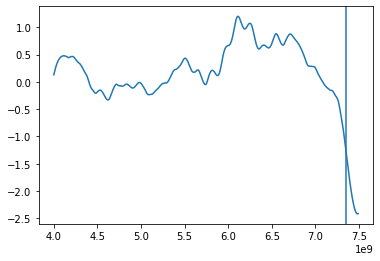

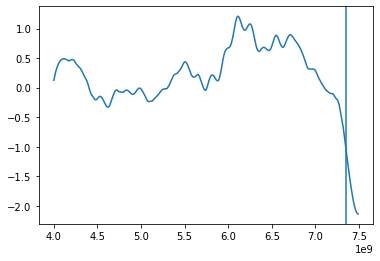

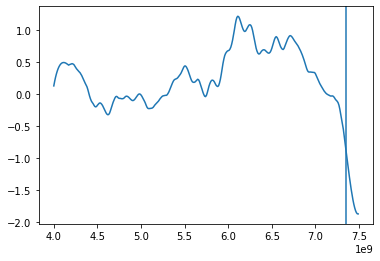

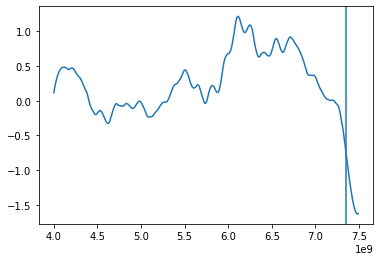

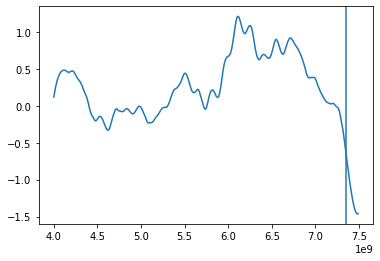

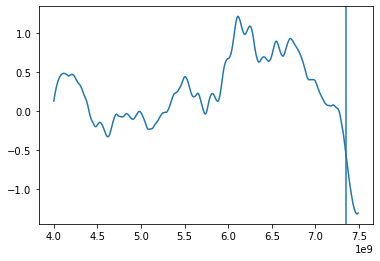

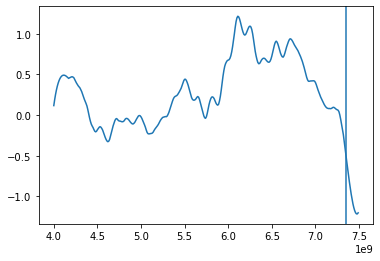

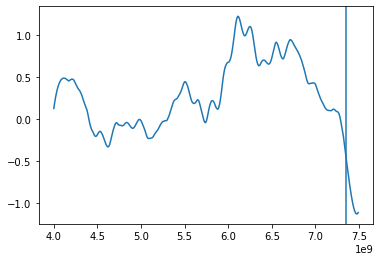

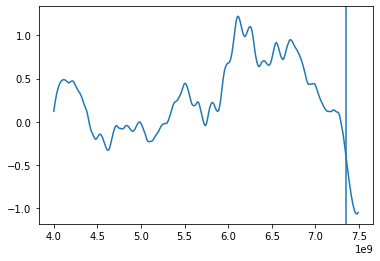

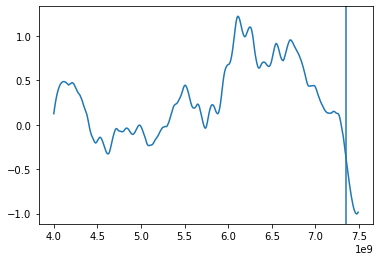

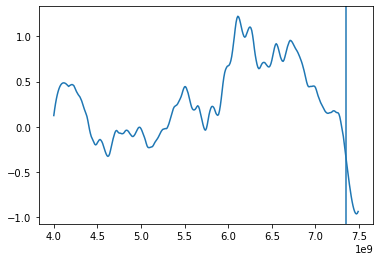

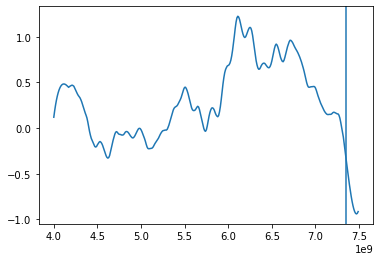

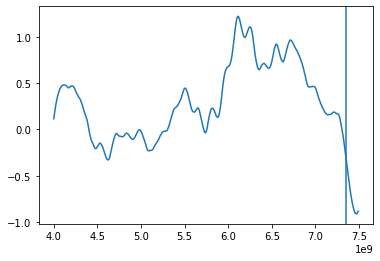

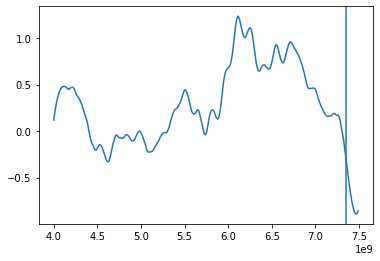

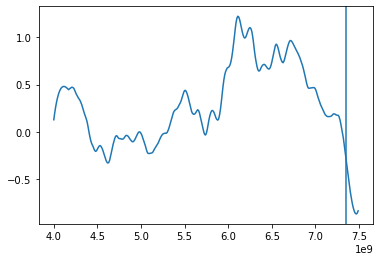

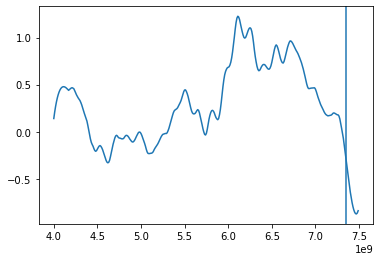

In [9]:
lf = Labber.LogFile(datapath)
nEntries  = lf.getNumberOfEntries()
FluxBias = np.squeeze(lf.getData(name='Lisa - Source current'))

#convert to mA
FluxBias = FluxBias*1e3

fits = {'f':[],'Q':[],'Qint':[],'Qext':[]}
for n in range(5,nEntries):
    (xdata,ydata) = lf.getTraceXY(y_channel='VNA - S21',entry = n)
    cutmask = xdata < 7.5e9
    xdata,ydata = xdata[cutmask],ydata[cutmask]
    window = round(len(ydata)*0.10)
    if (window % 2 == 0):
        window += 1       # ensure the window has an odd number of points
    window = max(window, 7)
    angley = np.angle(ydata)
    ph = savgol_filter(np.unwrap(angley),window,3)
    dphase = np.gradient(ph,xdata)
    est_f0_ind = np.argmin(dphase)
    est_f0 = xdata[est_f0_ind]
#     dmask = np.logical_and(xdata > est_f0-250e6, xdata < est_f0+250e6)
    plt.plot(xdata,ph)
    plt.axvline(x=est_f0)
    plt.show()
    plt.close()
    fits['f'].append(est_f0*1e-9)
#     res = Resonator('r',xdata,ydata)
# #     res = Resonator(xdata,ydata,fit_all=False)
#     res.autofit(fcrop=(est_f0*1e-9-0.004,est_f0*1e-9+0.004),electric_delay=0)
# #     res.autofit(electric_delay=0)
#     fits['f'].append(res.f0*1e-9)
#     fits['Q'].append(res.Q)
#     fits['Qint'].append(res.Qi)
#     fits['Qext'].append(res.Qc)
# #     fits['f'].append(res.location*1e-9)
# #     fits['Q'].append(res.Q)
# #     fits['Qint'].append(res.get_qint())
# #     fits['Qext'].append(res.get_qext())
#     if res.fit_found:
#         res.show(savefile = figpath+'resFit_{}uA_flux.png'.format(int(FluxBias[n]*1e3)))
#         print('fit results for bias {:.3}\n'.format(FluxBias[n]))
#         print(res)


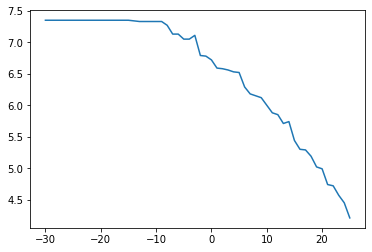

In [10]:
plt.plot(FluxBias[5:],fits['f'])

In [11]:
phiscale = 120

In [14]:
FluxZero = -30

In [15]:
PHI = (FluxBias[5:]-FluxZero)/phiscale

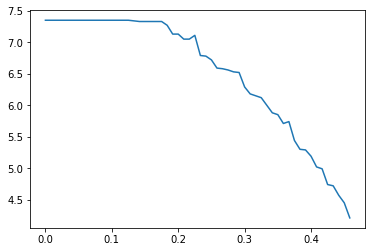

In [16]:
plt.plot(PHI,fits['f'])

In [21]:
def FluxFunc(fl,q0):
    return (1+q0*(1/np.cos(np.pi*fl)-1))**(-0.5)

In [18]:
ff = np.array(fits['f'])

0.4244886080441243


<ipython-input-21-e6425ee4abef>:2: RuntimeWarning: invalid value encountered in power
  return (1+q0*(1/np.cos(np.pi*fl)-1))**(-0.5)


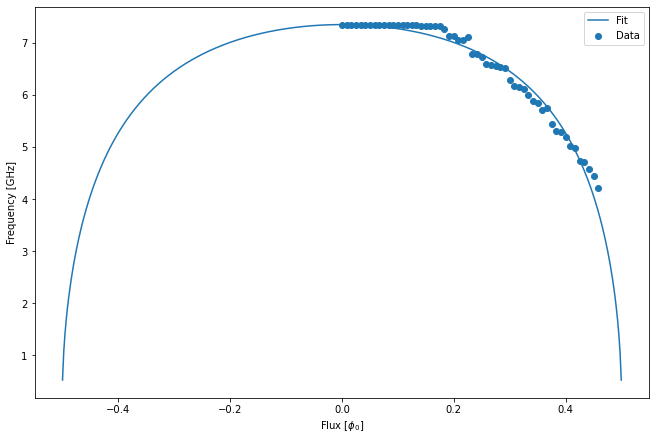

In [22]:
fig = plt.figure(figsize=[9,6],constrained_layout=True)
w = ff/np.max(ff)
p0 = [0.034]
pars,cov = curve_fit(FluxFunc,PHI,w,p0=p0)
print(pars[0])
x = np.linspace(-0.55,0.55,500)
ffit = FluxFunc(x,*pars)*np.max(ff)
plt.scatter(PHI,w*np.max(ff),label='Data')
plt.plot(x,ffit,label='Fit')
plt.xlabel('Flux [$\phi_0$]')
plt.ylabel('Frequency [GHz]')
plt.legend()
plt.show()